In [1]:
def forwardeuler(f,t0,u0,T,M):
    """
    Computes an approximate solution u of an ODE 

        u' = f(t,u)

    with a forward Euler method subject to u(t0) = u0.

    Parameters
    ----------

    f: The right-hand side function of (t,u).
    t0: The initial time.
    u0: The initial condition at t=t0.
    T: Endpoint of solution t-interval [t0,T]
    M: The number of equally spaced time steps.

    Returns
    -------

    t: An array of sample times.
    u: The approximate solution at the sample times.
    """
    import numpy as np
    t=np.linspace(t0,T,M+1)

    u = np.zeros( (M+1,) )

    u[0] = u0

    h = (T-t0)/M

    u_curr = u0
    for k in range(0,M):
        u_curr = u_curr + h*f(t[k],u_curr)
        u[k+1] = u_curr

    return (t,u)



In [2]:
import numpy as np
import matplotlib.pyplot as pp

In [3]:
rhs = lambda t,u : -20*(u-np.sin(t))+np.cos(t)
u_exact= lambda t: np.sin(t) + 1.2*np.exp(-20*t)

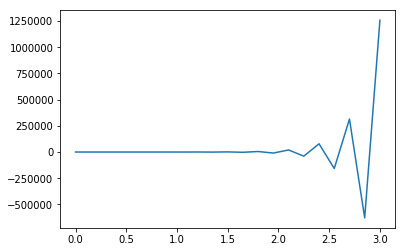

In [4]:
(t,u) = forwardeuler(rhs,t0=0,u0=1.2,T=3,M=20)
pp.plot(t,u)

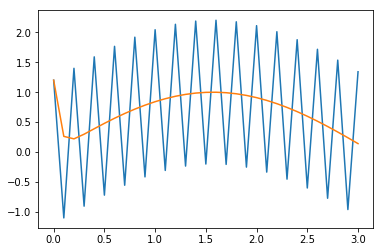

In [71]:
(t,u) = forwardeuler(rhs,t0=0,u0=1.2,T=3,M=30)
pp.plot(t,u,t,u_exact(t))

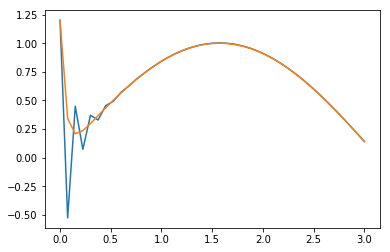

In [72]:
(t,u) = forwardeuler(rhs,t0=0,u0=1.2,T=3,M=40)
pp.plot(t,u,t,u_exact(t))

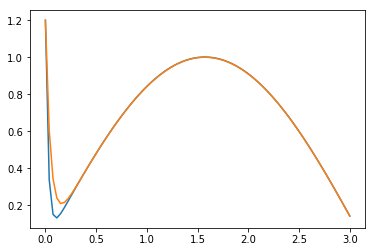

In [89]:
(t,u) = forwardeuler(rhs,t0=0,u0=1.2,T=3,M=80)
pp.plot(t,u,t,u_exact(t))

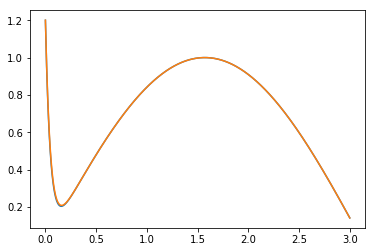

In [5]:
(t,u) = forwardeuler(rhs,t0=0,u0=1.2,T=3,M=1000)
pp.plot(t,u,t,u_exact(t))

In [19]:
def backwardeuler(f,t0,u0,T,M):
    import numpy as np
    from scipy.optimize import fsolve

    t=np.linspace(t0,T,M+1)

    u = np.zeros( (M+1,))

    u[0] = u0
    u_curr = u0

    h = (T-t0)/M

    for k in range(M):
        t_next = t[k+1]
        F = lambda U : u_curr - U + h*f(t_next,U)
        u_curr = fsolve(F,u_curr)

        u[k+1] = u_curr

    return (t,u)

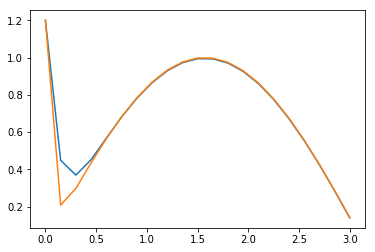

In [74]:
(t,u) = backwardeuler(rhs,t0=0,u0=1.2,T=3,M=20)
pp.plot(t,u,t,u_exact(t))

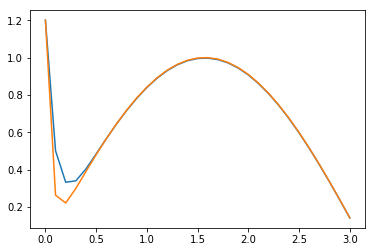

In [87]:
(t,u) = backwardeuler(rhs,t0=0,u0=1.2,T=3,M=30)
pp.plot(t,u,t,u_exact(t))

In [53]:
rhs2 = lambda t,u: np.array([-u[0],-20*u[1],-40*u[2]])

In [54]:
(t,u)=forwardeuler(rhs2,t0=0,u0=[1,1,1],T=3,M=20)

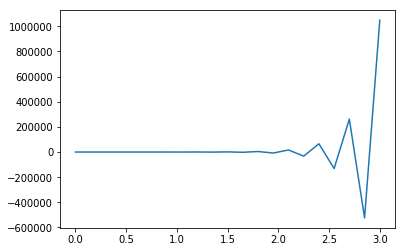

In [55]:
pp.plot(t,u[1,:])

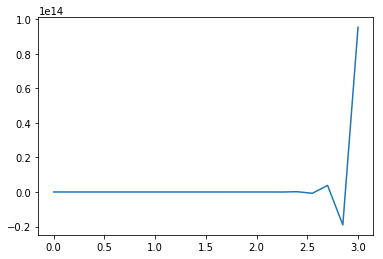

In [56]:
pp.plot(t,u[2,:])

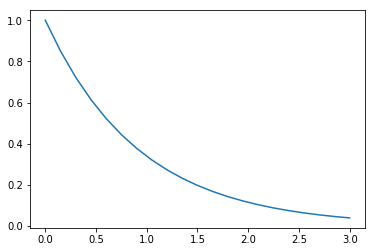

In [57]:
pp.plot(t,u[0,:])

In [58]:
(t,u)=forwardeuler(rhs2,t0=0,u0=[1,1,1],T=3,M=200)

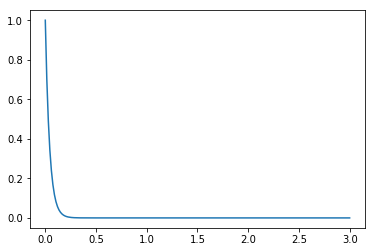

In [59]:
pp.plot(t,u[1,:])

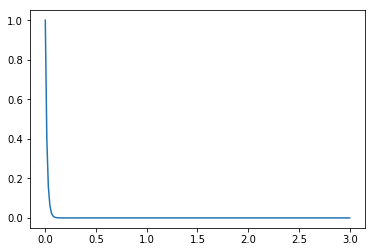

In [60]:
pp.plot(t,u[2,:])